In [1]:
import gzip
import io
import pandas as pd
import bioframe as bf


In [2]:
def is_gzip(file_path):
    with open(file_path, 'rb') as file:
        return file.read(2) == b'\x1f\x8b'

In [3]:
file_path = 'data/GRCh38.UCSC.SimpleRepeats.tsv.gz'

if is_gzip(file_path):
    bed_file = io.TextIOWrapper(gzip.open(file_path, 'rb'), encoding='utf-8')
else:
    bed_file = open(file_path)
        
bed = pd.read_table(bed_file)
bed.drop(columns='#bin', inplace=True)
bed.rename(columns = {'chromStart':'start', 'chromEnd': 'end'}, inplace=True)
print(bed)
assert bf.core.checks.is_bedframe(bed)

                           chrom      start        end name  period  copyNum  \
0                           chr1   12582784   12583841  trf      57     18.3   
1                           chr1   12582839   12582993  trf       4     37.8   
2                           chr1   12582910   12583333  trf      30     13.5   
3                           chr1   22020082   22020671  trf     308      1.9   
4                           chr1  121609878  121734316  trf     342    365.9   
...                          ...        ...        ...  ...     ...      ...   
1049710  chr22_KI270739v1_random      42428      42470  trf       8      5.2   
1049711  chr22_KI270739v1_random      42529      60923  trf     171    107.5   
1049712  chr22_KI270739v1_random      42644      60923  trf     513     35.6   
1049713  chr22_KI270739v1_random      50068      61010  trf     342     32.1   
1049714  chr22_KI270739v1_random      61202      73979  trf     171     74.9   

         consensusSize  perMatch  perIn

In [4]:
bedclusters = bf.cluster(bed, min_dist=None)
bedclusters.head()


,chrom,start,end,name,period,copyNum,consensusSize,perMatch,perIndel,score,A,C,G,T,entropy,sequence,cluster,cluster_start,cluster_end
0,chr1,12582784,12583841,trf,57,18.3,57,66,20,241,22,51,1,24,1.56,TCCATCCATCCATCCATCCATCCATCCATCCATCCCTCCCTCATCT...,3774,12582784,12583892
1,chr1,12582839,12582993,trf,4,37.8,4,75,13,93,21,52,0,25,1.51,TCCA,3774,12582784,12583892
2,chr1,12582910,12583333,trf,30,13.5,30,69,18,218,23,51,1,23,1.57,CATCCATCCATCCACTCACCTACCCCACTC,3774,12582784,12583892
3,chr1,22020082,22020671,trf,308,1.9,307,83,4,774,31,22,27,18,1.97,CTGTAATCCCAGCACTTTGGGAGGCCGAGGCAAGAGGATCACCTGA...,6261,22020082,22020671
4,chr1,121609878,121734316,trf,342,365.9,341,72,8,44205,29,22,19,28,1.98,AAATATCCACTTGCAGATTCTACAAAAAGAGTGTTTCAAAACTGCT...,27737,121609789,121734418


In [5]:
print(len(bedclusters['cluster'].unique()))
for cluster in bedclusters['cluster'].unique():
    print(bedclusters.loc[bedclusters['cluster'] == cluster])
    break
    

704534
     chrom     start       end name  period  copyNum  consensusSize  perMatch  \
0     chr1  12582784  12583841  trf      57     18.3             57        66   
1     chr1  12582839  12582993  trf       4     37.8              4        75   
2     chr1  12582910  12583333  trf      30     13.5             30        69   
6407  chr1  12583038  12583186  trf      68      2.2             64        78   
6408  chr1  12583041  12583455  trf     219      1.9            220        84   
6409  chr1  12583120  12583178  trf      26      2.2             26        90   
6410  chr1  12583317  12583892  trf       4    137.2              4        74   
6411  chr1  12583676  12583833  trf      50      3.1             50        74   
6412  chr1  12583711  12583784  trf      38      1.9             37        84   

      perIndel  score   A   C  G   T  entropy  \
0           20    241  22  51  1  24     1.56   
1           13     93  21  52  0  25     1.51   
2           18    218  23  51  1  2

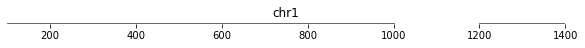

In [6]:
df1 = pd.DataFrame([
    ['chr1', 100, 500],
    ['chr1', 300, 800],
    ['chr1', 800, 1000],
    ['chr1', 1200, 1400],
    ],
    columns=['chrom', 'start', 'end']
)

bf.vis.plot_intervals(df1, show_coords=True, xlim=(100,1400))